In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("tips (data for regression problem).csv")


In [23]:

df['sex'] = df['sex'].astype('category').cat.codes
df['smoker'] = df['smoker'].astype('category').cat.codes
df['day'] = df['day'].astype('category').cat.codes
df['time'] = df['time'].astype('category').cat.codes


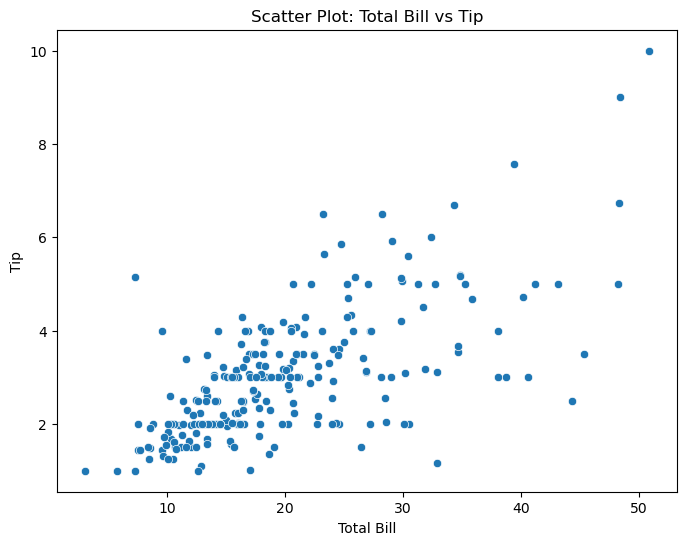

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="total_bill", y="tip", data=df)
plt.title("Scatter Plot: Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


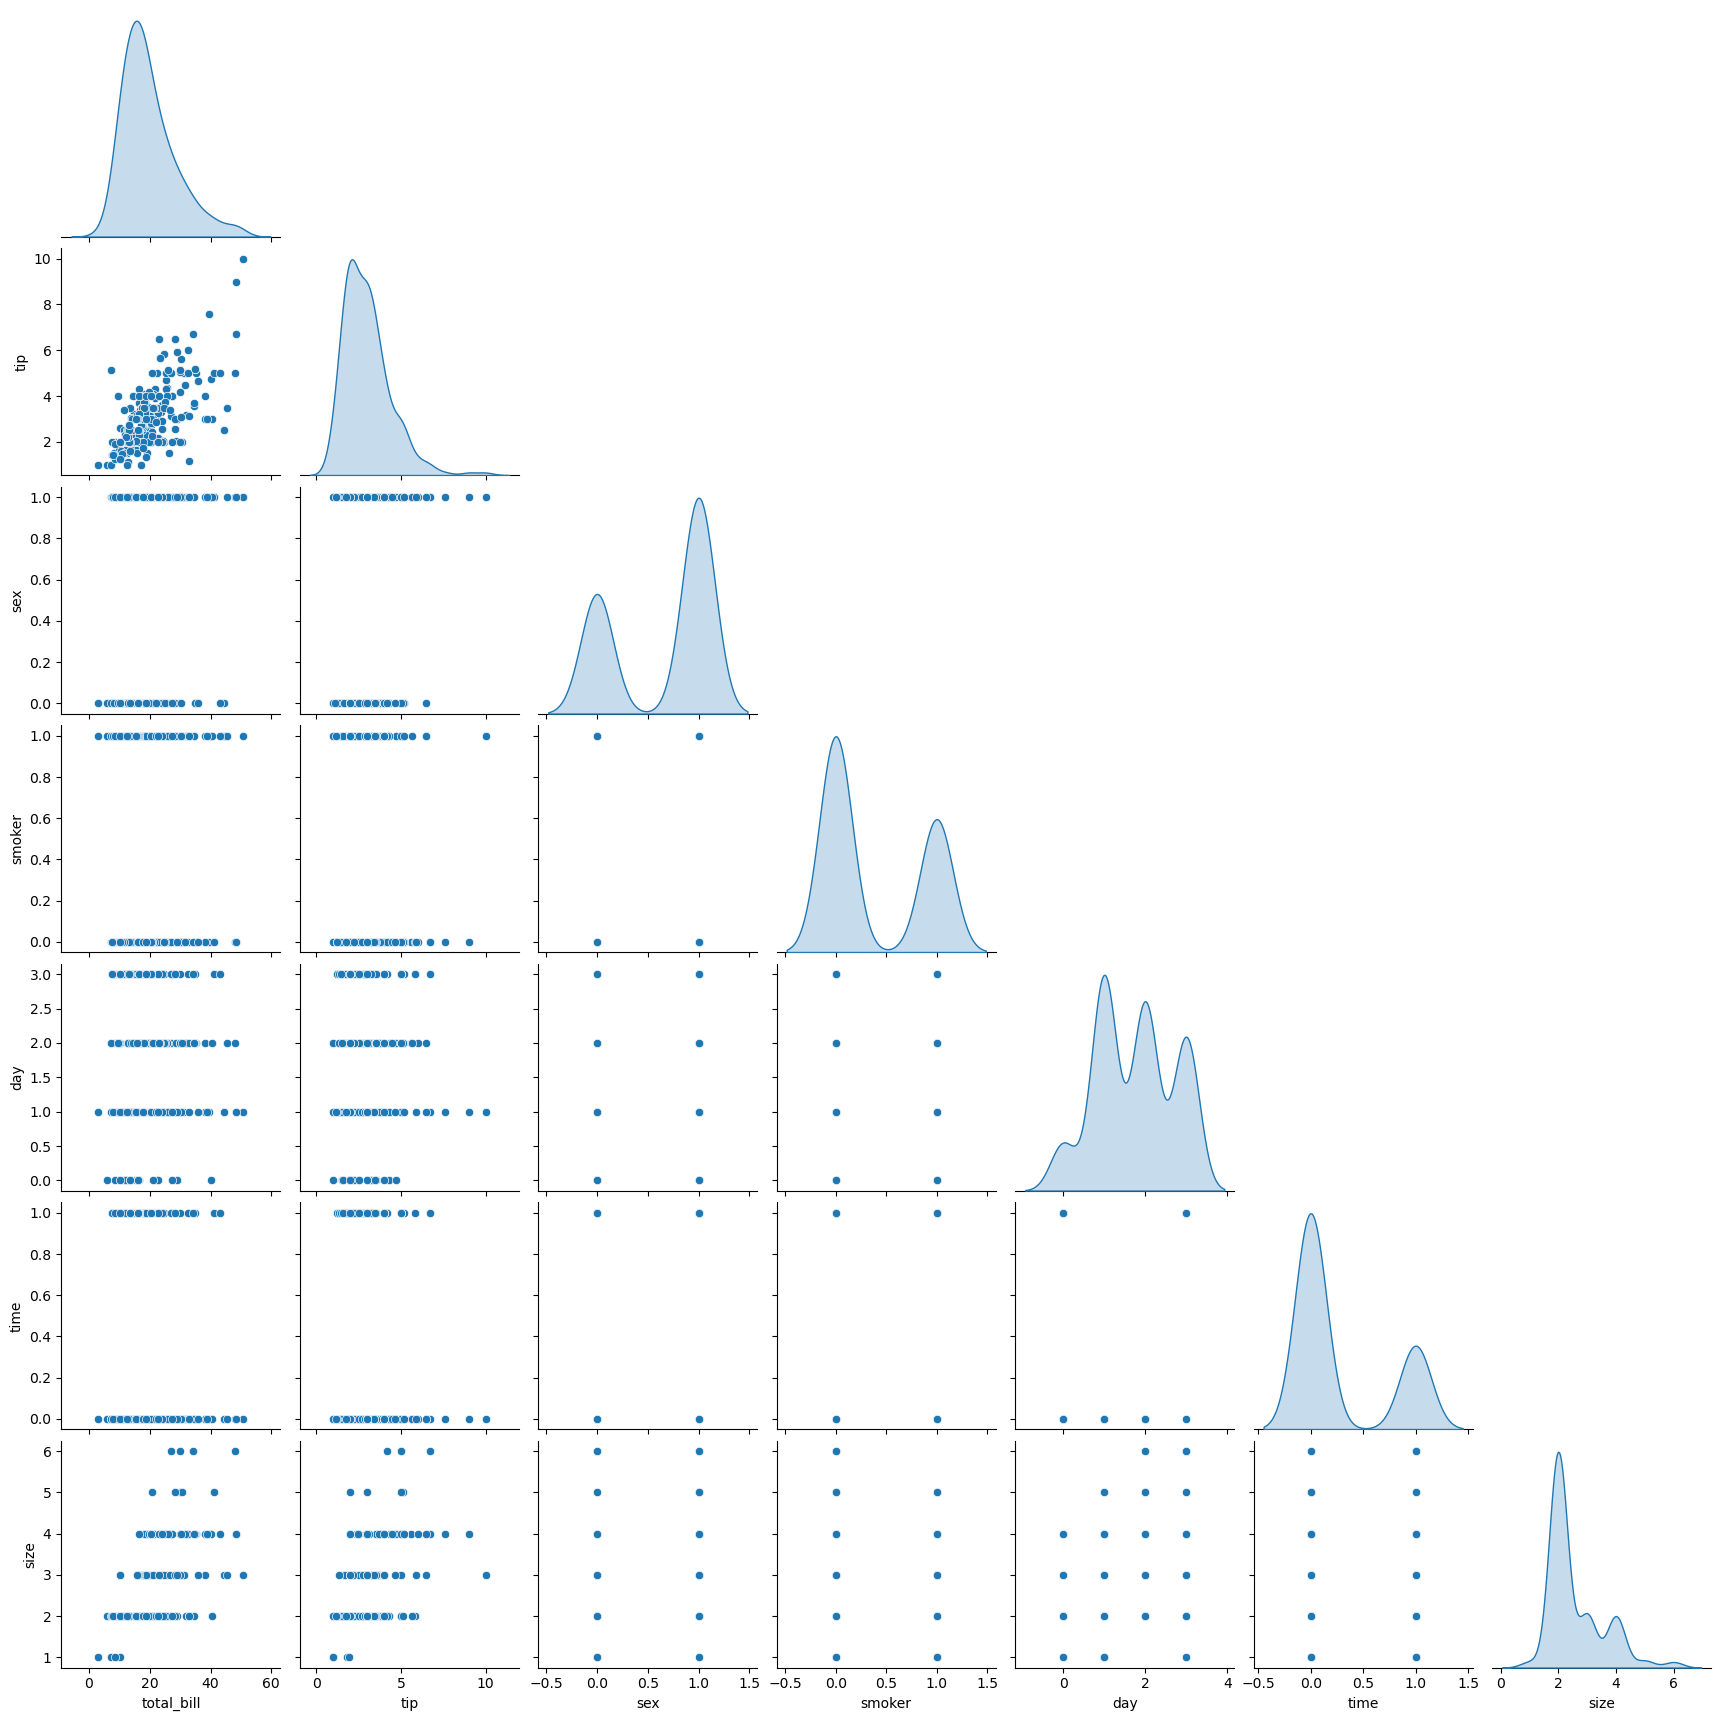

In [25]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()


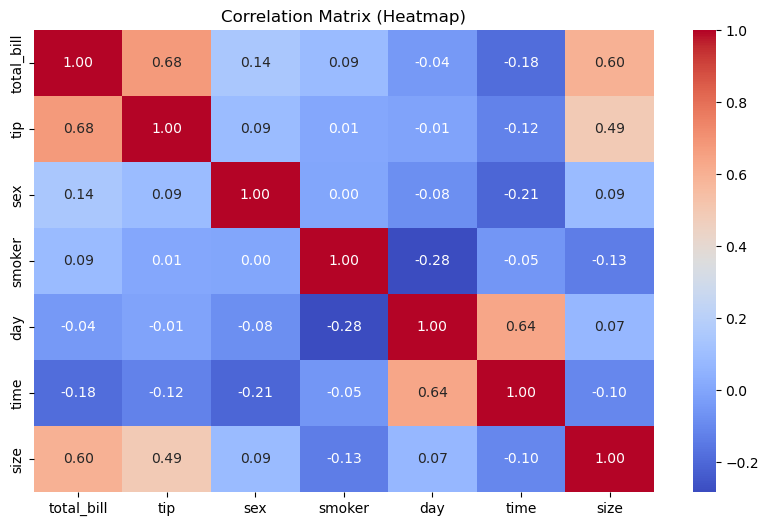

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Heatmap)")
plt.show()


In [27]:
X = df[['total_bill', 'size', 'day', 'sex', 'smoker', 'time']]
y = df['tip']
X = add_constant(X)  
model = OLS(y, X).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)

print("\nRainbow Test for Linearity:")
print(f"Rainbow Statistic: {rainbow_stat:.4f}, p-value: {rainbow_p_value:.4f}")
if rainbow_p_value > 0.05:
    print("The data follows a linear trend (fail to reject the null hypothesis).")
else:
    print("The data does not follow a linear trend (reject the null hypothesis).")



Rainbow Test for Linearity:
Rainbow Statistic: 1.2036, p-value: 0.1580
The data follows a linear trend (fail to reject the null hypothesis).


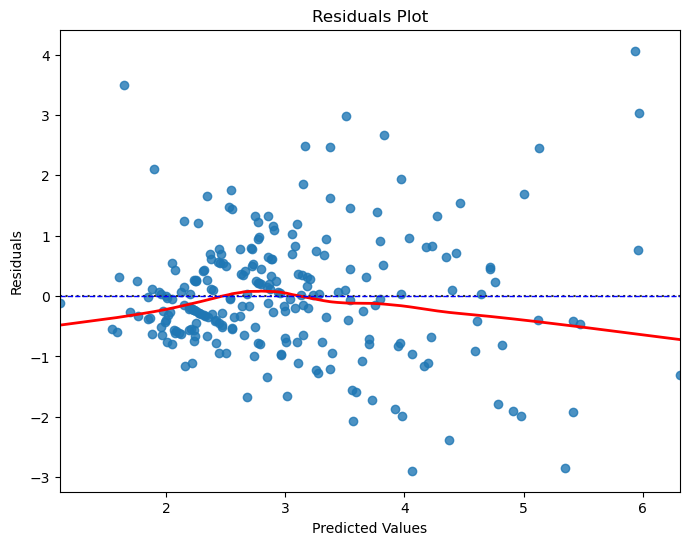

In [28]:
predicted = model.predict(X)
residuals = y - predicted

plt.figure(figsize=(8, 6))
sns.residplot(x=predicted, y=residuals, lowess=True, line_kws={"color": "red", "lw": 2})
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='blue', linestyle='--', linewidth=1)
plt.show()


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")



Linear Regression Model Performance:
MAE: 0.6704
MSE: 0.6948
RMSE: 0.8336
R²: 0.4441
